# Quick Demo for kadatasci.ml

In [1]:
%matplotlib inline

In [2]:
import sys
import matplotlib.pyplot as plt
import ipywidgets
from IPython.display import display
import seaborn as sns
sys.path.append("..")
import util.bq_util

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Authorize clients

In [3]:
bq, gcs = util.bq_util.get_authed_clients()

Authenticating with BigQuery and GCS...
Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&client_id=124072386181-qqedvnl36ver0khc3pmqbh4bevlh58qd.apps.googleusercontent.com&access_type=offline

Enter verification code: 4/xvx4AzbpREsPQWqLGHj1Pq0_lRT7w0mDMUYEkVFMtw0
Authentication successful.


### You should now have a bigquery client and a boto client authorized to access GCS

In [4]:
print bq
print gcs

<module 'boto' from '/usr/local/lib/python2.7/dist-packages/boto/__init__.pyc'>


### Construct and execute a query

In [5]:
exclude = ["sat-v1", "test-prep"]
query = """SELECT * FROM latest_content.topic_tree WHERE domain NOT IN ('%s')""" % ("', '".join(exclude))
print query

SELECT * FROM latest_content.topic_tree WHERE domain NOT IN ('sat-v1', 'test-prep')


In [6]:
topic_tree = util.bq_util.query_to_df(query)

Job ID,End time,Duration,Rows,Data size,Cost
job__zi096Rn8vg9gkxP_bMPcJgvF84,2016-01-03 19:16:47,7,"16,722",2.4MiB,0.0¢


In [7]:
topic_tree.head()

,path_index,domain,subject,topic,tutorial,kind,title,id,node_slug
0,0,partner-content,british-museum,the-americas-bm,meso-central-america-bm,Article,Maya: The Yaxchilán Lintels,xbc158ef1,a/maya-the yaxchiln lintels
1,0,humanities,prehistoric-art,None,neolithic-art,Article,The Neolithic Revolution,xe7f5ca0a,a/the-neolithic revolution
2,0,partner-content,CAS-biodiversity,where-biodiversity-is-found,distribution-patterns,Article,Activities: biodiversity distribution patterns,x2531ffd2,a/activities-biodiversity distribution patterns
3,0,humanities,art-americas,native-north-america,native-american-west,Article,Eastern Shoshone: Hide Painting of the Sun Dan...,x33bb59f9,a/eastern-shoshone hide painting of the sun da...
4,0,science,biology,cell-signaling,signaling-between-single-celled-organisms,Article,Cell-cell signaling in unicellular organisms,x68823eb9,a/cell-cell signaling in unicellular organisms


### Plot results

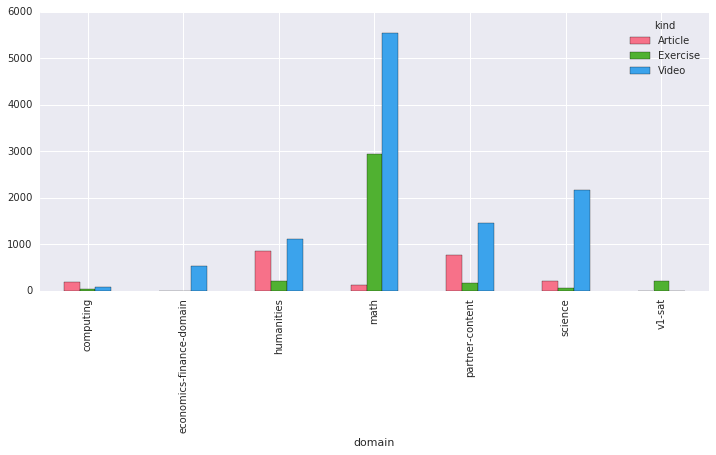

In [8]:
f, ax = plt.subplots(figsize=[12,5])
plotdata = topic_tree.groupby(["domain", "kind"]).count().unstack("kind")['id']
plotdata.plot(kind="bar", ax=ax, color=sns.color_palette("husl", len(topic_tree.kind.unique())))

In [9]:
selector = ipywidgets.Dropdown(description="Content Type", options = list(topic_tree.kind.unique()))
search = ipywidgets.Text(description="Query", placeholder="e.g. equations")
container = ipywidgets.HBox([selector, search])
display(container)

In [11]:
columns = ["kind", "domain", "subject", "topic", "title"]
topic_tree[
    (topic_tree["kind"]==selector.selected_label) & 
    (topic_tree["title"].apply(lambda x: search.value.lower() in x.lower()))
    ][columns]

,kind,domain,subject,topic,title
4,Article,science,biology,cell-signaling,Cell-cell signaling in unicellular organisms
87,Article,science,biology,cellular-molecular-biology,Phases of the cell cycle
132,Article,science,biology,cellular-molecular-biology,Cell cycle regulators
278,Article,science,biology,cell-signaling,Cellular response
676,Article,science,biology,structure-of-a-cell,Cell-cell junctions
727,Article,science,biology,cellular-respiration-and-fermentation,Regulation of cellular respiration
753,Article,science,biology,cell-signaling,Introduction to cell signaling
816,Article,science,biology,structure-of-a-cell,Intro to eukaryotic cells
837,Article,humanities,art-americas,british-colonies,"Jefferson, Monticello"
898,Article,science,biology,cellular-molecular-biology,Cell cycle checkpoints
